# Descriptive Analysis

In [63]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
from scipy import stats

import psutil
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Storing path
path = Path("../data/ifood_cleaned.csv")

# Read CSV with pandas
data = pd.read_csv(path)

# Read columns dtypes
with open('../data/cleaned_dtypes.json', 'r') as f:
    data_types = json.load(f)

data = data.astype(data_types)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   ID                   2205 non-null   int64          
 1   Year_Birth           2205 non-null   int64          
 2   Year_Old             2205 non-null   int64          
 3   CustomerFor          2205 non-null   timedelta64[ns]
 4   Dt_Customer          2205 non-null   datetime64[ns] 
 5   Education            2205 non-null   category       
 6   Marital_Status       2205 non-null   category       
 7   Income               2205 non-null   Int64          
 8   Kidhome              2205 non-null   int64          
 9   Teenhome             2205 non-null   int64          
 10  ChildrenHome         2205 non-null   int64          
 11  Recency              2205 non-null   int64          
 12  MntSpentTotal        2205 non-null   int64          
 13  MntWines          

In [5]:
data["MntTotal_cat"], intervals = pd.cut(data["MntSpentTotal"], 6, 
                                         precision=0, retbins=True)

temp, first_int = pd.cut(np.arange(2, 426), 5, retbins=True)
bins = list(first_int) + list(intervals[2:])

data["MntTotal_cat"], intervals = pd.cut(data["MntSpentTotal"], bins, 
                                         precision=0, right=False, 
                                         retbins=True, ordered=True)

In [6]:
data["Recency_cat"] = data["Recency_cat"].cat.as_ordered()
data["Age_cat"] = data["Age_cat"].cat.as_ordered()

data["Education"] = data["Education"].cat.reorder_categories(["Basic", 
                                                              "Graduation", 
                                                              "2n Cycle", 
                                                              "Master", 
                                                              "PhD"], 
                                                              ordered=True)

data["Income_cat"] = data["Income_cat"].cat\
    .reorder_categories(['D1', 'D2', 'D3', 'D4', 'D5', 
                         'D6', 'D7', 'D10'], ordered=True)

## Categorical Variables

### Frequencies

In [7]:
frec_abs = data["Marital_Status"].value_counts()
frec_rel = frec_abs / len(data["Marital_Status"])
frec_per = 100 * frec_rel

frec_tab = pd.concat([frec_abs, frec_rel, frec_per], axis=1,
                     keys=["frec_abs", "frec_rel", "frec_per"])

frec_tab

,frec_abs,frec_rel,frec_per
Marital_Status,,,
Married,857,0.388662,38.866213
Together,571,0.258957,25.895692
Single,470,0.213152,21.315193
Divorced,231,0.104762,10.476190
Widow,76,0.034467,3.446712


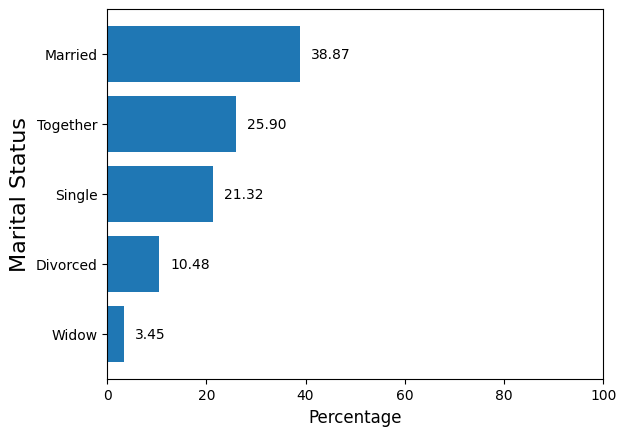

In [24]:
fig, ax = plt.subplots()

#ax.bar(frec_tab.index, frec_tab["frec_per"].sort_values(ascending=True), 
  #     color="grey");

hbars = ax.barh(frec_tab.index, frec_tab["frec_per"], 
                align="center")

ax.set_ylabel("Marital Status", fontsize=16);
ax.set_xlabel("Percentage", fontsize=12);

ax.invert_yaxis();
ax.bar_label(hbars, padding=8, fmt='%.2f');
ax.set_xlim(0,100);
plt.show()

In [52]:
frec_abs = data["Education"].value_counts().sort_index()
frec_abs_acc = data["Education"].value_counts().sort_index().cumsum()

frec_rel = (frec_abs / len(data["Education"])).round(4)
frec_rel_acc = (frec_abs / len(data["Education"])).cumsum().round(4)

frec_per = 100 * frec_rel
frec_per_acc = (100 * frec_rel).cumsum()

frec_tab = pd.concat([frec_abs, frec_rel, frec_per], axis=1,
                     keys=["frec_abs", "frec_rel", "frec_per"])
frec_acc = pd.concat([frec_abs_acc, frec_rel_acc, frec_per_acc], axis=1,
                     keys=["frec_abs_acc", "frec_rel_acc", "frec_per_acc"])
frec_tab = pd.concat([frec_tab, frec_acc], axis=1)

frec_tab

,frec_abs,frec_rel,frec_per,frec_abs_acc,frec_rel_acc,frec_per_acc
Education,,,,,,
Basic,54,0.0245,2.45,54,0.0245,2.45
Graduation,1113,0.5048,50.48,1167,0.5293,52.93
2n Cycle,198,0.0898,8.98,1365,0.6190,61.91
Master,363,0.1646,16.46,1728,0.7837,78.37
PhD,477,0.2163,21.63,2205,1.0000,100.00


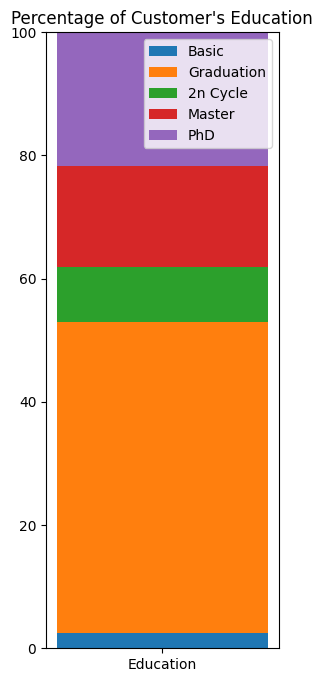

In [53]:
width = 0.2
label = "Education"
fig, ax = plt.subplots(figsize=(3,8))
bottom = np.zeros(1)

for boolean, values in frec_tab["frec_per"].items():
    p = ax.bar(label, values, width, label=boolean, bottom=bottom)
    bottom += values

ax.set_title("Percentage of Customer's Education")
ax.legend(loc="upper right")
ax.set_ylim(0,100)

plt.show()

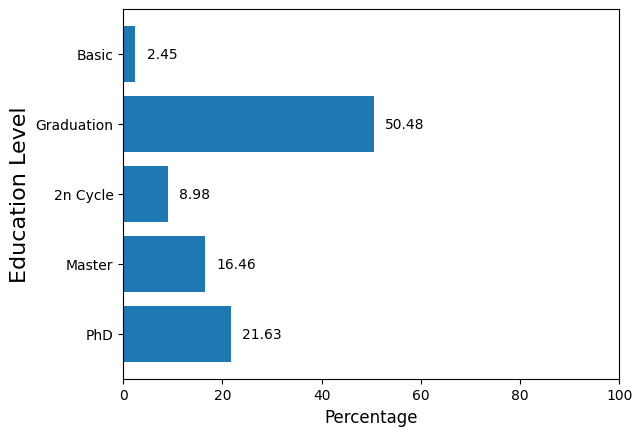

In [54]:
fig, ax = plt.subplots()

#ax.bar(frec_tab.index, frec_tab["frec_per"].sort_values(ascending=True), 
  #     color="grey");

hbars = ax.barh(frec_tab.index, frec_tab["frec_per"], 
                align="center")

ax.set_ylabel("Education Level", fontsize=16);
ax.set_xlabel("Percentage", fontsize=12);

ax.invert_yaxis();
ax.bar_label(hbars, padding=8, fmt='%.2f');
ax.set_xlim(0,100);
plt.show()

In [8]:
frec_abs = data["Age_cat"].value_counts().sort_index()
frec_abs_acc = data["Age_cat"].value_counts().sort_index().cumsum()

frec_rel = (frec_abs / len(data["Age_cat"])).round(4)
frec_rel_acc = (frec_abs / len(data["Age_cat"])).cumsum().round(4)

frec_per = 100 * frec_rel
frec_per_acc = (100 * frec_rel).cumsum()

frec_tab = pd.concat([frec_abs, frec_rel, frec_per], axis=1,
                     keys=["frec_abs", "frec_rel", "frec_per"])
frec_acc = pd.concat([frec_abs_acc, frec_rel_acc, frec_per_acc], axis=1,
                     keys=["frec_abs_acc", "frec_rel_acc", "frec_per_acc"])
frec_tab = pd.concat([frec_tab, frec_acc], axis=1)

frec_tab

,frec_abs,frec_rel,frec_per,frec_abs_acc,frec_rel_acc,frec_per_acc
Age_cat,,,,,,
25_34,60,0.0272,2.72,60,0.0272,2.72
35_44,357,0.1619,16.19,417,0.1891,18.91
45_54,729,0.3306,33.06,1146,0.5197,51.97
55_64,502,0.2277,22.77,1648,0.7474,74.74
65_74,451,0.2045,20.45,2099,0.9519,95.19
75_above,106,0.0481,4.81,2205,1.0000,100.00


In [55]:
frec_abs = data["Income_cat"].value_counts().sort_index()
frec_abs_acc = data["Income_cat"].value_counts().sort_index().cumsum()

frec_rel = (frec_abs / len(data["Income_cat"])).round(4)
frec_rel_acc = (frec_abs / len(data["Income_cat"])).cumsum().round(4)

frec_per = 100 * frec_rel
frec_per_acc = (100 * frec_rel).cumsum()

frec_tab = pd.concat([frec_abs, frec_rel, frec_per], axis=1,
                     keys=["frec_abs", "frec_rel", "frec_per"])
frec_acc = pd.concat([frec_abs_acc, frec_rel_acc, frec_per_acc], axis=1,
                     keys=["frec_abs_acc", "frec_rel_acc", "frec_per_acc"])
frec_tab = pd.concat([frec_tab, frec_acc], axis=1)

frec_tab

,frec_abs,frec_rel,frec_per,frec_abs_acc,frec_rel_acc,frec_per_acc
Income_cat,,,,,,
D1,90,0.0408,4.08,90,0.0408,4.08
D2,410,0.1859,18.59,500,0.2268,22.67
D3,553,0.2508,25.08,1053,0.4776,47.75
D4,525,0.2381,23.81,1578,0.7156,71.56
D5,471,0.2136,21.36,2049,0.9293,92.92
D6,142,0.0644,6.44,2191,0.9937,99.36
D7,7,0.0032,0.32,2198,0.9968,99.68
D10,7,0.0032,0.32,2205,1.0000,100.00


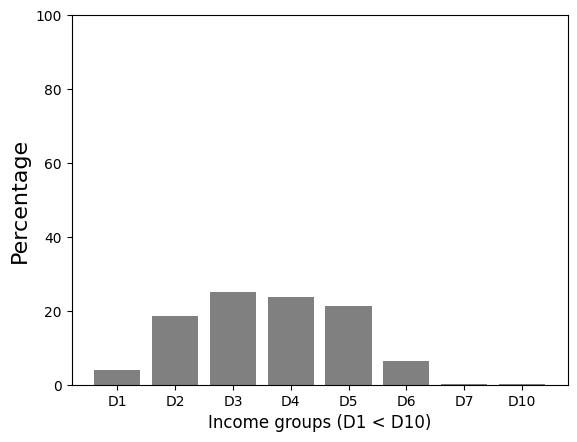

In [85]:
fig, ax = plt.subplots()

cmap = plt.get_cmap("Greys")

bars = ax.bar(frec_tab.index, frec_tab["frec_per"], 
                align="center", color="grey")

ax.set_ylabel("Percentage", fontsize=16);
ax.set_xlabel("Income groups (D1 < D10)", fontsize=12);

ax.set_ylim(0,100);
plt.show()

In [10]:
frec_abs = data["MntTotal_cat"].value_counts().sort_index()
frec_abs_acc = data["MntTotal_cat"].value_counts().sort_index().cumsum()

frec_rel = (frec_abs / len(data["MntTotal_cat"])).round(4)
frec_rel_acc = (frec_abs / len(data["MntTotal_cat"])).cumsum().round(4)

frec_per = 100 * frec_rel
frec_per_acc = (100 * frec_rel).cumsum()

frec_tab = pd.concat([frec_abs, frec_rel, frec_per], axis=1,
                     keys=["frec_abs", "frec_rel", "frec_per"])
frec_acc = pd.concat([frec_abs_acc, frec_rel_acc, frec_per_acc], axis=1,
                     keys=["frec_abs_acc", "frec_rel_acc", "frec_per_acc"])
frec_tab = pd.concat([frec_tab, frec_acc], axis=1)

frec_tab

,frec_abs,frec_rel,frec_per,frec_abs_acc,frec_rel_acc,frec_per_acc
MntTotal_cat,,,,,,
"[2.0, 87.0)",646,0.2930,29.30,646,0.2930,29.30
"[87.0, 171.0)",196,0.0889,8.89,842,0.3819,38.19
"[171.0, 256.0)",105,0.0476,4.76,947,0.4295,42.95
"[256.0, 340.0)",109,0.0494,4.94,1056,0.4789,47.89
"[340.0, 425.0)",88,0.0399,3.99,1144,0.5188,51.88
"[425.0, 845.0)",333,0.1510,15.10,1477,0.6698,66.98
"[845.0, 1265.0)",353,0.1601,16.01,1830,0.8299,82.99
"[1265.0, 1685.0)",230,0.1043,10.43,2060,0.9342,93.42
"[1685.0, 2105.0)",117,0.0531,5.31,2177,0.9873,98.73


In [48]:
frec_abs = data["Recency_cat"].value_counts().sort_index()
frec_abs_acc = data["Recency_cat"].value_counts().sort_index().cumsum()

frec_rel = (frec_abs / len(data["Recency_cat"])).round(4)
frec_rel_acc = (frec_abs / len(data["Recency_cat"])).cumsum().round(4)

frec_per = 100 * frec_rel
frec_per_acc = (100 * frec_rel).cumsum()

frec_tab = pd.concat([frec_abs, frec_rel, frec_per], axis=1,
                     keys=["frec_abs", "frec_rel", "frec_per"])
frec_acc = pd.concat([frec_abs_acc, frec_rel_acc, frec_per_acc], axis=1,
                     keys=["frec_abs_acc", "frec_rel_acc", "frec_per_acc"])
frec_tab = pd.concat([frec_tab, frec_acc], axis=1)

frec_tab

,frec_abs,frec_rel,frec_per,frec_abs_acc,frec_rel_acc,frec_per_acc
Recency_cat,,,,,,
0_24,557,0.2526,25.26,557,0.2526,25.26
25_49,547,0.2481,24.81,1104,0.5007,50.07
50_74,561,0.2544,25.44,1665,0.7551,75.51
75_99,540,0.2449,24.49,2205,1.0000,100.00


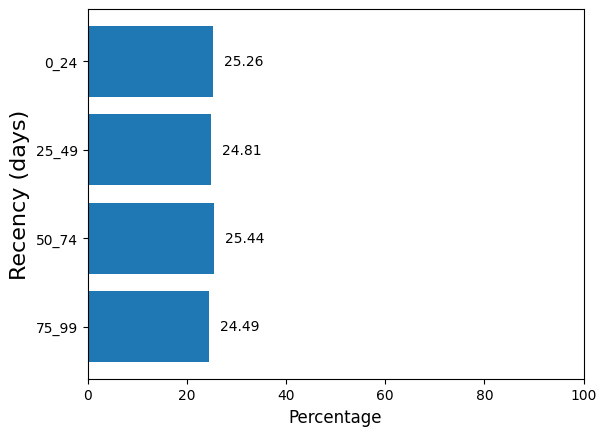

In [50]:
fig, ax = plt.subplots()

#ax.bar(frec_tab.index, frec_tab["frec_per"].sort_values(ascending=True), 
  #     color="grey");

hbars = ax.barh(frec_tab.index, frec_tab["frec_per"], 
                align="center")

ax.set_ylabel("Recency (days)", fontsize=16);
ax.set_xlabel("Percentage", fontsize=12);

ax.invert_yaxis();
ax.bar_label(hbars, padding=8, fmt='%.2f');
ax.set_xlim(0,100);
plt.show()

In [12]:
accp_cmp1 = data["AcceptedCmp1"].value_counts()
accp_cmp2 = data["AcceptedCmp2"].value_counts()
accp_cmp3 = data["AcceptedCmp3"].value_counts()
accp_cmp4 = data["AcceptedCmp4"].value_counts()
accp_cmp5 = data["AcceptedCmp5"].value_counts()

frec_abs = pd.concat([accp_cmp1, accp_cmp2, accp_cmp3, accp_cmp4, accp_cmp5],
                     keys=["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", 
                           "AcceptedCmp4", "AcceptedCmp5"])

frec_abs.index.names = ["Campaign", "Acceptance"]
frec_abs = pd.DataFrame(frec_abs)
frec_abs.columns = ["Frequencies"]

In [13]:
frec_rel = (frec_abs["Frequencies"] / len(data["ID"])).round(4)
frec_per = 100 * frec_rel

frec_tab = pd.concat([frec_abs, frec_rel, frec_per], axis=1,
                     keys=["Absolute", "Relative", "Percentage"])

frec_tab.columns.names = ["Frequencies", "drop"]
frec_tab = frec_tab.droplevel(level="drop", axis=1)
frec_tab

Frequencies              Absolute  Relative  Percentage
Campaign     Acceptance                                
AcceptedCmp1 0               2064    0.9361       93.61
             1                141    0.0639        6.39
AcceptedCmp2 0               2175    0.9864       98.64
             1                 30    0.0136        1.36
AcceptedCmp3 0               2043    0.9265       92.65
             1                162    0.0735        7.35
AcceptedCmp4 0               2041    0.9256       92.56
             1                164    0.0744        7.44
AcceptedCmp5 0               2045    0.9274       92.74
             1                160    0.0726        7.26

### Cuantitative Variables

In [14]:
# Notebook info
process = psutil.Process()
memory_used = process.memory_info().rss / (1024 ** 2)  # MB

print(f"\n\tMemory used: {memory_used:.2f} MB\n")

!pip list


	Memory used: 164.07 MB

Package                   Version
------------------------- ---------
asttokens                 2.4.1
attrs                     23.2.0
Brotli                    1.1.0
certifi                   2024.6.2
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
Cython                    3.0.10
debugpy                   1.8.1
decorator                 5.1.1
exceptiongroup            1.2.0
executing                 2.0.1
fastjsonschema            2.20.0
fonttools                 4.51.0
idna                      3.7
importlib_metadata        7.1.0
importlib_resources       6.4.0
iniconfig                 2.0.0
ipykernel                 6.29.4
ipython                   8.24.0
ipywidgets                8.1.2
jedi                      0.19.1
jsonschema                4.22.0
jsonschema-specifications 2023.12.1
jupyter_client            8.6.2
jupyter_core              